# 01. Importing libraries

In [20]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 02. Importing data

In [21]:
path = r'/Users/marcela/Desktop/CF/Data Immersion/Achievement 6/Brazilian Ecommerce Analysis'

In [22]:
df_ords = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'olist_orders_dataset.csv'), index_col = False)

In [23]:
df_prods = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'olist_products_dataset.csv'), index_col = False)

In [24]:
df_payments = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'olist_order_payments_dataset.csv'), index_col = False)

In [25]:
df_items = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'olist_order_items_dataset.csv'), index_col = False)

# 03. Data consistency checks

## df_ords

In [26]:
df_ords.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [27]:
df_ords.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [28]:
df_ords.shape

(99441, 8)

In [29]:
# Check for missing values
missing_values = df_ords.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [30]:
# Examine data types
data_types = df_ords.dtypes
print("\nData Types:\n", data_types)


Data Types:
 order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


In [31]:
# Check for duplicates
duplicates = df_ords.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)


Number of Duplicate Rows: 0


## df_prods

In [32]:
df_prods.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [33]:
df_prods.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [34]:
df_prods.shape

(32951, 9)

In [35]:
# Check for missing values
missing_values = df_prods.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [36]:
# Examine data types
data_types = df_prods.dtypes
print("\nData Types:\n", data_types)


Data Types:
 product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object


In [37]:
# Check for duplicates
duplicates = df_prods.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)


Number of Duplicate Rows: 0


## df_payments

In [38]:
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [39]:
df_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [40]:
df_payments.shape

(103886, 5)

In [41]:
# Check for missing values
missing_values = df_payments.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [42]:
# Examine data types
data_types = df_payments.dtypes
print("\nData Types:\n", data_types)


Data Types:
 order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object


In [43]:
# Check for duplicates
duplicates = df_payments.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)


Number of Duplicate Rows: 0


## df_items

In [44]:
df_items.head()   

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [45]:
df_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [46]:
df_items.shape

(112650, 7)

In [47]:
# Check for missing values
missing_values = df_items.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [48]:
# Examine data types
data_types = df_items.dtypes
print("\nData Types:\n", data_types)


Data Types:
 order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


In [49]:
# Check for duplicates
duplicates = df_items.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)


Number of Duplicate Rows: 0


In [50]:
# Convert 'shipping_limit_date' to datetime
df_items['shipping_limit_date'] = pd.to_datetime(df_items['shipping_limit_date'])

In [51]:
# Verify the conversion
print("Updated Data Types:\n", df_items.dtypes)

Updated Data Types:
 order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object


In [52]:
# Get a statistical summary of the numerical fields
numerical_summary = df_items.describe()
print("\nStatistical Summary of Numerical Fields:\n", numerical_summary)


Statistical Summary of Numerical Fields:
        order_item_id            shipping_limit_date          price  \
count  112650.000000                         112650  112650.000000   
mean        1.197834  2018-01-07 15:36:52.192685312     120.653739   
min         1.000000            2016-09-19 00:15:34       0.850000   
25%         1.000000     2017-09-20 20:57:27.500000      39.900000   
50%         1.000000            2018-01-26 13:59:35      74.990000   
75%         1.000000  2018-05-10 14:34:00.750000128     134.900000   
max        21.000000            2020-04-09 22:35:08    6735.000000   
std         0.705124                            NaN     183.633928   

       freight_value  
count  112650.000000  
mean       19.990320  
min         0.000000  
25%        13.080000  
50%        16.260000  
75%        21.150000  
max       409.680000  
std        15.806405  


In [53]:
# Function to calculate IQR and identify outliers
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [54]:
# Outlier analysis for 'price'
price_outliers = find_outliers(df_items, 'price')
print("Number of outliers in 'price':", len(price_outliers))

Number of outliers in 'price': 8427


In [55]:
# Outlier analysis for 'freight_value'
freight_outliers = find_outliers(df_items, 'freight_value')
print("Number of outliers in 'freight_value':", len(freight_outliers))

Number of outliers in 'freight_value': 12134


In [56]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

In [57]:
# Ignore future warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

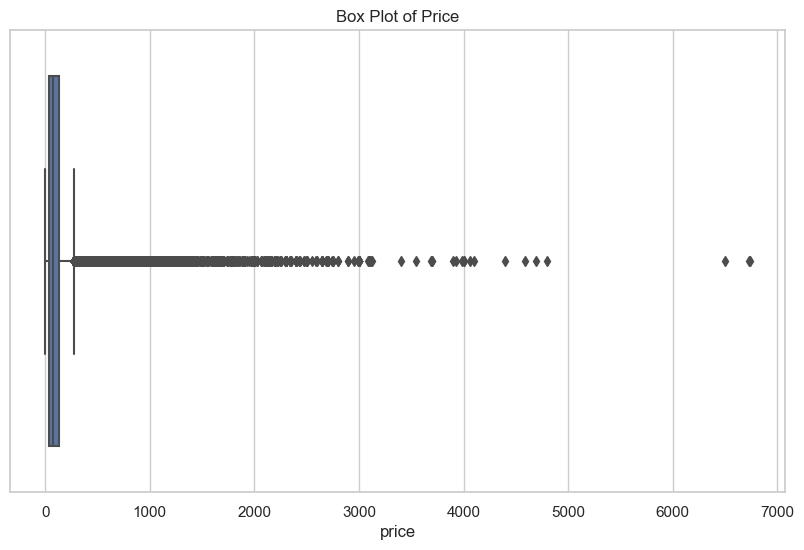

In [58]:
# Creating a box plot for 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_items['price'])
plt.title('Box Plot of Price')
plt.show()

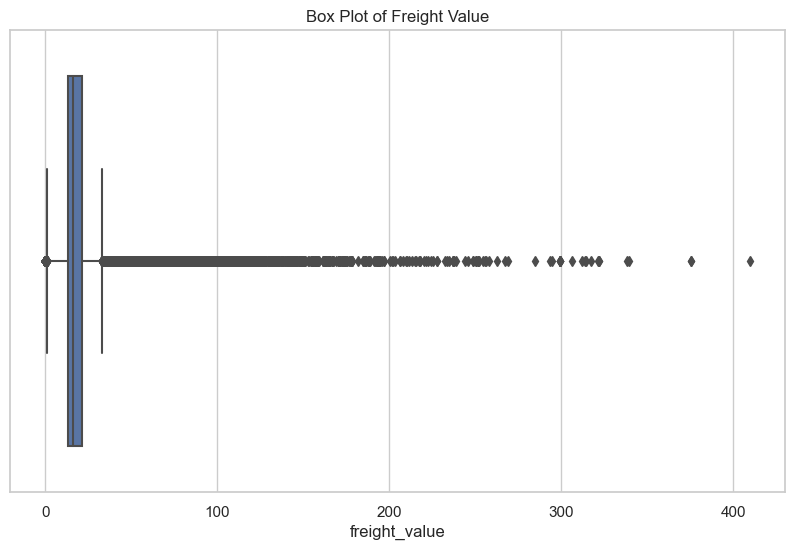

In [59]:
# Creating a box plot for 'freight_value'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_items['freight_value'])
plt.title('Box Plot of Freight Value')
plt.show()

In [60]:
# Check for logical inconsistencies
# Ensure that freight values are not greater than the price
inconsistencies = df_items[df_items['freight_value'] > df_items['price']]
print(f'Number of inconsistencies between freight value and price: {len(inconsistencies)}')

Number of inconsistencies between freight value and price: 4124


In [61]:
# Check for unique values in categorical columns
# Ensure that there are no misspelled or duplicated categories with different cases
# Ensure the consistency across columns
# Check if 'order_item_id' starts from 1 for each 'order_id'
order_consistency = (df_items.groupby('order_id')['order_item_id']
                     .nunique()
                     .reset_index(name='unique_item_ids'))
inconsistent_orders = order_consistency[order_consistency['unique_item_ids'] != 1]
print(f'Number of orders with inconsistent item IDs: {len(inconsistent_orders)}')

Number of orders with inconsistent item IDs: 9803


# 04. Basic descriptive statistical analysis

In [62]:
# Review the first few rows of the dataset
display(df_items.head())

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [63]:
# Get descriptive statistics for numerical variables
numerical_stats = df_items.describe()
display(numerical_stats)

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


In [64]:
# Determine the time range of the dataset
# This helps to understand the temporal scope of the data
print("Earliest Date:", df_items['shipping_limit_date'].min())
print("Latest Date:", df_items['shipping_limit_date'].max())

Earliest Date: 2016-09-19 00:15:34
Latest Date: 2020-04-09 22:35:08


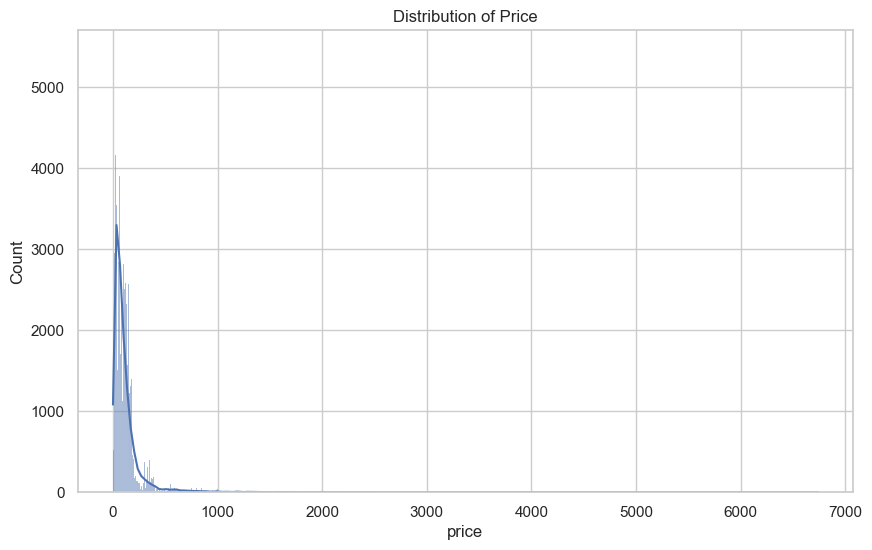

In [65]:
# Plot for 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df_items['price'], kde=True)
plt.title('Distribution of Price')
plt.show()

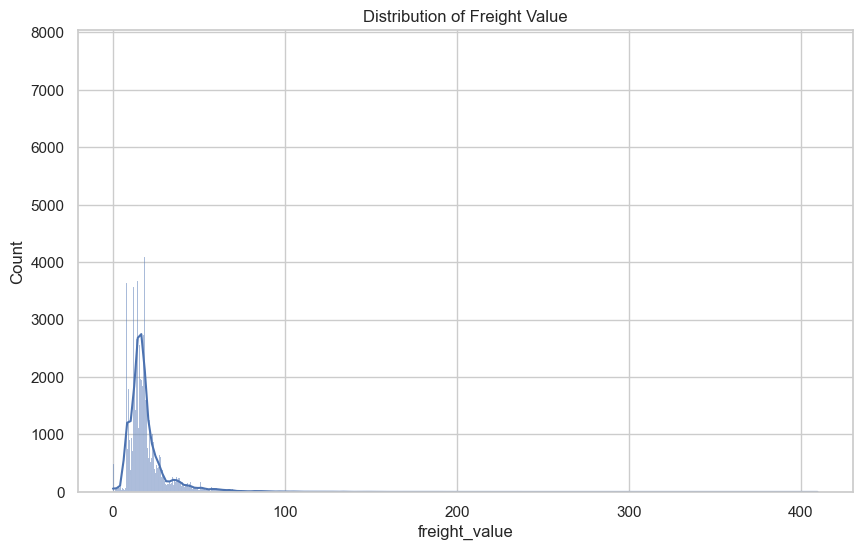

In [66]:
# Plot for 'freight_value'
plt.figure(figsize=(10, 6))
sns.histplot(df_items['freight_value'], kde=True)
plt.title('Distribution of Freight Value')
plt.show()

## Correlation Analysis

In [67]:
# Calculate the correlation matrix
correlation_matrix = df_items[['price', 'freight_value']].corr()

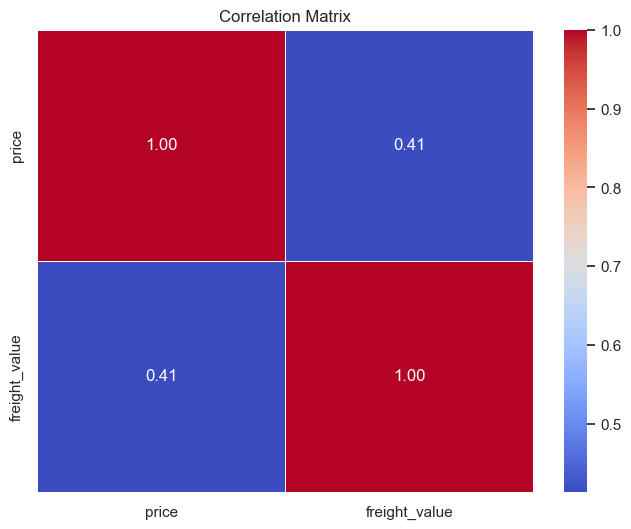

In [68]:
# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Categorical Analysis

In [69]:
# Count of unique values in a categorical column
unique_order_ids = df_items['order_id'].nunique()
print(f'Number of unique orders: {unique_order_ids}')

Number of unique orders: 98666


In [70]:
# Frequency of the top 10 most common product_ids
top_products = df_items['product_id'].value_counts().head(10)
print(f'Top 10 products:\n{top_products}')

Top 10 products:
product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: count, dtype: int64


## Temporal Analysis

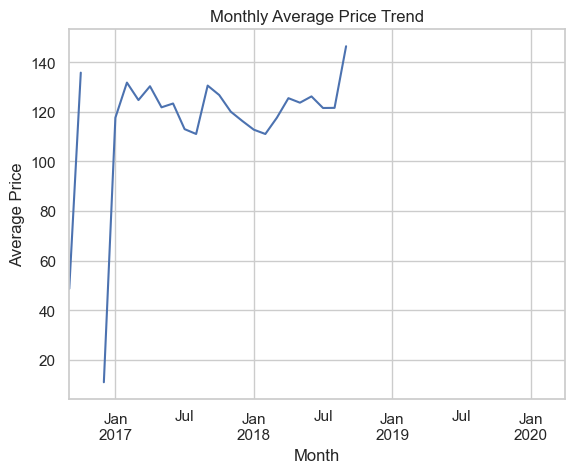

In [71]:
# Grouping by month and calculating mean price
df_items['shipping_limit_date'] = pd.to_datetime(df_items['shipping_limit_date'])
df_items.set_index('shipping_limit_date')['price'].resample('M').mean().plot()
plt.title('Monthly Average Price Trend')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

## Data Types for IDs

In [72]:
# Convert ID fields to 'category' data type
df_items['order_id'] = df_items['order_id'].astype('category')
df_items['product_id'] = df_items['product_id'].astype('category')
df_items['seller_id'] = df_items['seller_id'].astype('category')

In [73]:
# Check data types again
print(df_items.dtypes)

order_id                     category
order_item_id                   int64
product_id                   category
seller_id                    category
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object


## Exploratory Data Analysis (EDA)

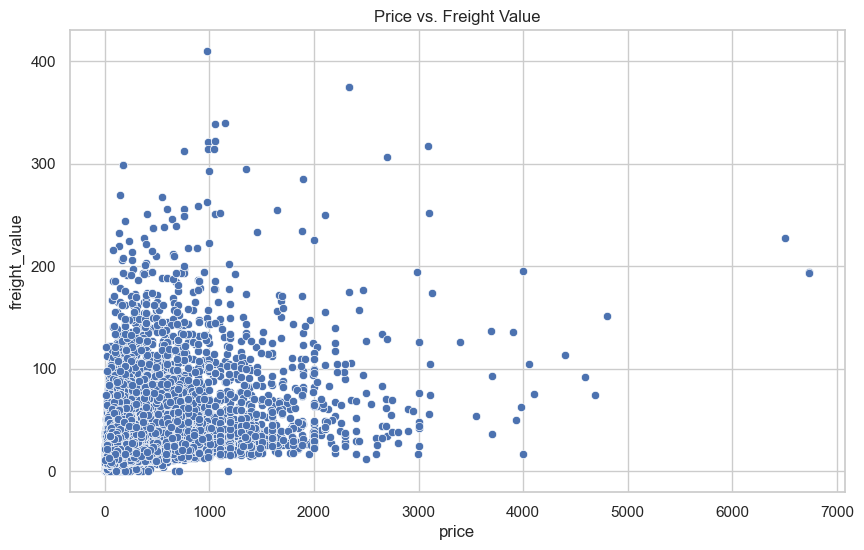

In [74]:
# Scatter plot for price vs. freight_value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='freight_value', data=df_items)
plt.title('Price vs. Freight Value')
plt.show()

## Save the cleaned dataset to a new CSV file

In [75]:
df_items.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'items_checked.csv'), index=False)

In [76]:
df_ords.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_checked.csv'), index=False)

In [77]:
df_prods.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'products_checked.csv'), index=False)

In [78]:
df_payments.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'payments_checked.csv'), index=False)